In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import pandas as pd 


df = pd.read_csv('WCA_export_Results.tsv','\t')
threespeed = df.loc[df.eventId=='333']

In [2]:
faz = threespeed.loc[threespeed.personName=='Feliks Zemdegs']
pp = threespeed.loc[threespeed.personName=='Patrick Ponce']

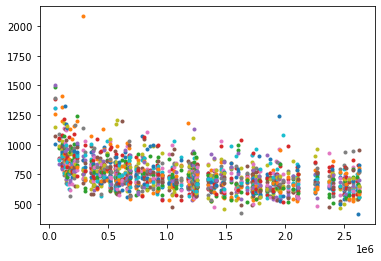

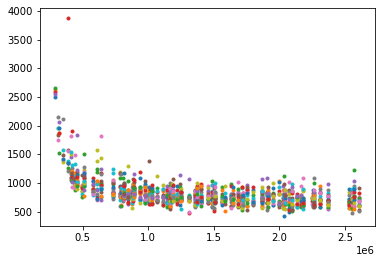

In [3]:
faztimes=[]
for round in faz.index:
    if faz.value1[round]>0:
        plt.plot(round, faz.value1[round],'.')
        faztimes.append(faz.value1[round])
    if faz.value2[round]>0:
        plt.plot(round, faz.value2[round],'.')
        faztimes.append(faz.value2[round])
    if faz.value3[round]>0:
        plt.plot(round, faz.value3[round],'.')
        faztimes.append(faz.value3[round])
    if faz.value4[round]>0:
        plt.plot(round, faz.value4[round],'.')
        faztimes.append(faz.value4[round])
    if faz.value5[round]>0:
        plt.plot(round, faz.value5[round],'.')
        faztimes.append(faz.value5[round])

plt.show()

plt.figure()
pptimes = []
for round in pp.index:
    if pp.value1[round]>0:
        plt.plot(round, pp.value1[round],'.')
        pptimes.append(pp.value1[round])
    if pp.value2[round]>0:
        plt.plot(round, pp.value2[round],'.')
        pptimes.append(pp.value2[round])
    if pp.value3[round]>0:
        plt.plot(round, pp.value3[round],'.')
        pptimes.append(pp.value3[round])
    if pp.value4[round]>0:
        plt.plot(round, pp.value4[round],'.')
        pptimes.append(pp.value4[round])
    if pp.value5[round]>0:
        plt.plot(round, pp.value5[round],'.')
        pptimes.append(pp.value5[round])

plt.show()

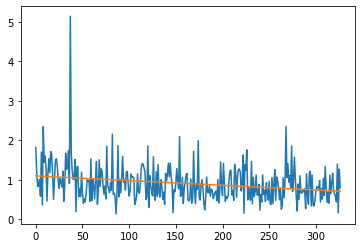

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     83.39
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           7.37e-18
Time:                        09:21:20   Log-Likelihood:                -180.21
No. Observations:                 327   AIC:                             364.4
Df Residuals:                     325   BIC:                             372.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7288      0.181     -4.030      0.000      -1.084      -0.373
x1             0.2214      0.024      9.132      0.000       0.174       0.269
==============================================================================
Omnibus:                      195.152   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3073.620
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                      17.405   Cond. No.                         58.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

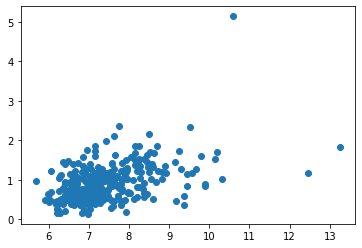

In [4]:
# plot std faz
fazmean = []
fazstd = []
for round in range(faz.shape[0]):
    if np.min(faz.iloc[round,10:15])>0:
        fazmean.append(np.mean(faz.iloc[round,10:15]/100))
        fazstd.append(np.std(faz.iloc[round,10:15]/100))

import statsmodels.api as sm
x = np.arange(0,np.array(fazstd).shape[0])
x = sm.add_constant(x)
model = sm.OLS(fazstd,x).fit()
model.summary()


plt.plot(fazstd)
x = np.arange(0,np.array(fazstd).shape[0])
y = model.params[1]*x + model.params[0]
plt.plot(x,y)
plt.show()


plt.figure()
plt.scatter(fazmean,fazstd)

fazmean = sm.add_constant(fazmean)
model2 = sm.OLS(fazstd,fazmean).fit()
model2.summary()

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     11.87
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           0.000678
Time:                        23:48:21   Log-Likelihood:                -269.26
No. Observations:                 232   AIC:                             542.5
Df Residuals:                     230   BIC:                             549.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4022      0.102     13.812      0.000       1.202       1.602
x

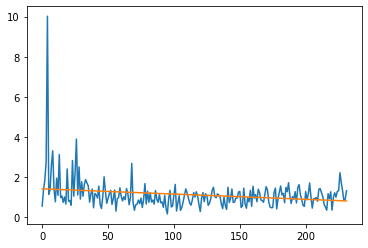

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     67.03
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.84e-14
Time:                        23:48:21   Log-Likelihood:                -245.43
No. Observations:                 232   AIC:                             494.9
Df Residuals:                     230   BIC:                             501.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3273      0.180     -1.816      0.071      -0.682       0.028
x1             0.1737      0.021      8.187      0.000       0.132       0.216
==============================================================================
Omnibus:                      254.512   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22034.317
Skew:                           4.080   Prob(JB):                         0.00
Kurtosis:                      50.041   Cond. No.                         33.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

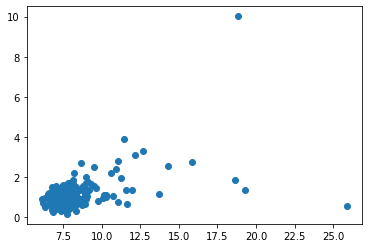

In [93]:
# Do same for PP

ppmean = []
ppstd = []
for round in range(pp.shape[0]):
    if np.min(pp.iloc[round,10:15])>0:
        ppmean.append(np.mean(pp.iloc[round,10:15]/100))
        ppstd.append(np.std(pp.iloc[round,10:15]/100))

import statsmodels.api as sm
x = np.arange(0,np.array(ppstd).shape[0])
x = sm.add_constant(x)
model = sm.OLS(ppstd,x).fit()
print(model.summary())


plt.plot(ppstd)
x = np.arange(0,np.array(ppstd).shape[0])
y = model.params[1]*x + model.params[0]
plt.plot(x,y)
plt.show()


plt.figure()
plt.scatter(ppmean,ppstd)


ppmean = sm.add_constant(ppmean)
model2 = sm.OLS(ppstd,ppmean).fit()
model2.summary()